<a href="https://colab.research.google.com/github/AgustinVieyra/cloud-classifier/blob/main/Cloud%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Cloning the repository to upload it to GitHub
!git clone https://github.com/AgustinVieyra/cloud-classifier.git

Cloning into 'cloud-classifier'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
#Reading the different libraries for the project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
#Importing google drive package
from  google.colab import drive

In [ ]:
#Importing the Deep Learning classifier
from fastai.vision import *

In [ ]:
#Connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Save path to the project folder 
root_path = 'gdrive/My Drive/Colab Notebooks/'

In [ ]:
#Save path to the folder with the images
proj_path =  'gdrive/My Drive/Colab Notebooks/Clouds/'

In [ ]:
#Save fastai path
p_path = Path(proj_path)

In [2]:
/#Spliting the data 80/20 for training and testing
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

SyntaxError: ignored

In [ ]:
data.classes

['Cirrus', 'Cumulus']

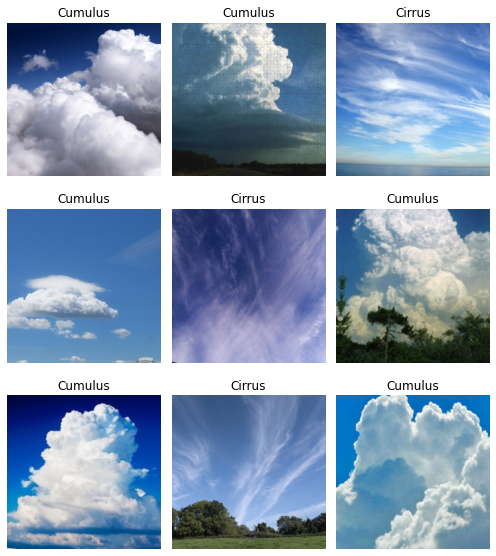

In [ ]:
#Showing a sample of the images 
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
#Showing the folder, the amount of classes, the amount of training images, and the amout of validation images
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Cirrus', 'Cumulus'], 2, 168, 41)

In [ ]:
#Creating a cnn_learner object
#Use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
#Train 9 epochs of the model 
learn.fit_one_cycle(9)

epoch,train_loss,valid_loss,error_rate,time
0,1.243000,1.146626,0.512195,01:07
1,0.961101,0.717201,0.170732,00:59
2,0.696003,0.281940,0.097561,00:56
3,0.562116,0.044383,0.024390,00:56
4,0.441413,0.008307,0.000000,00:57
5,0.363426,0.003030,0.000000,00:56
6,0.306834,0.001069,0.000000,00:56
7,0.263272,0.000692,0.000000,00:54
8,0.230857,0.000493,0.000000,00:54


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
#Saving model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/Colab Notebooks/Clouds/models/model1_34.pth')

We can see how on the epoch 4, the error rate went to 0, which means that the model could predict perfectly the tests. However I'll execute the code for when the error rate is $\neq$ 0, when I make the next iteration with more data.

In [ ]:
#Unfreeze model. Lets you train earlier layers 
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


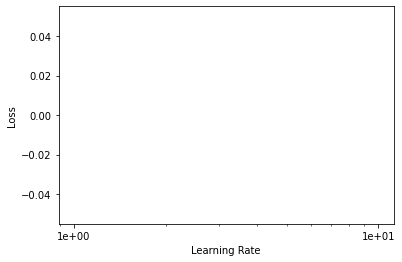

In [ ]:
#Finding the optimal learning rates 
learn.lr_find()
learn.recorder.plot()

The graph doesn't show the loss. However I'll pretend that the minimum ocurred ad 1e-3, thus I'll sweep between one and three orders of magnitude before (this is made so when more data is introduced, it doesn't explode, but still trains quickly).

In [ ]:
# fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.006884,0.000340,0.000000,01:18
1,0.006739,0.000252,0.000000,01:16


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


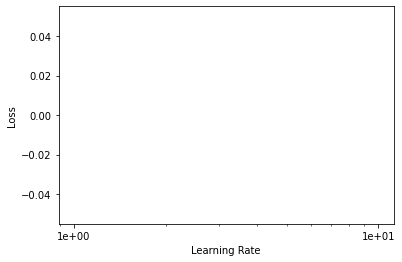

In [ ]:
#Checking "the second model"
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
#Saqving second model*
learn.save('model2_34')

In [ ]:
#Loading the first model
learn.load('model1_34')
#Making a short cut
interp = ClassificationInterpretation.from_learner(learn)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


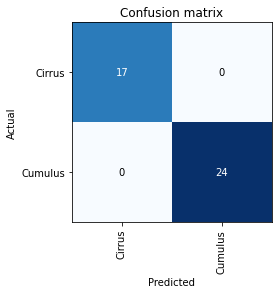

In [ ]:
#The following plot shows the results of model on the validation set 
interp.plot_confusion_matrix()

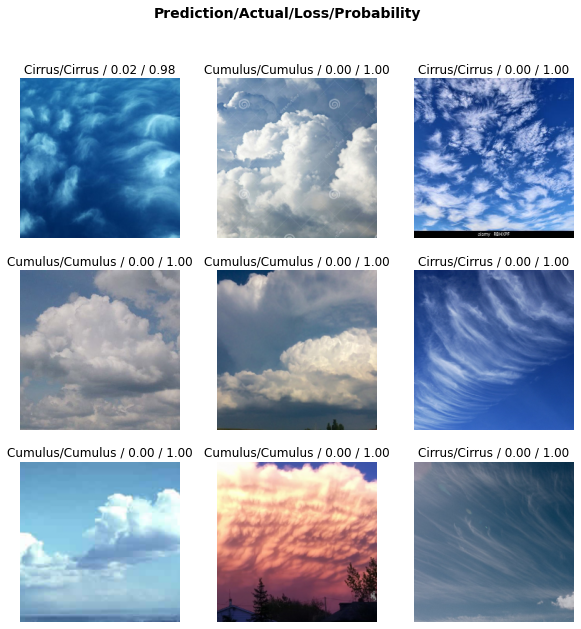

In [ ]:
#With the following code we can plot the most wrong losses, but since they weren't any, it will show some of the images
interp.plot_top_losses(9, figsize=(10,10))